## Data Analyst Test

In [1]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Load Table
data_listrik = pd.read_csv('Electric_Production.csv')
data_listrik

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151
...,...,...
392,9/1/2017,98.6154
393,10/1/2017,93.6137
394,11/1/2017,97.3359
395,12/1/2017,114.7212


In [3]:
#Mengecek info dari table
data_listrik.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        397 non-null    object 
 1   IPG2211A2N  397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [5]:
data_listrik.describe()

,IPG2211A2N
count,397.000000
mean,88.847218
std,15.387834
min,55.315100
25%,77.105200
50%,89.779500
75%,100.524400
max,129.404800


In [7]:
#Mengecek missing value
data_listrik.isna().sum()

DATE          0
IPG2211A2N    0
dtype: int64

## 1. Hitunglah rata-rata produksi listrik per triwulan

In [8]:
#Mengubah format tanggal
data_listrik['DATE'] = pd.to_datetime(data_listrik['DATE'])
data_listrik

,DATE,IPG2211A2N
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151
...,...,...
392,2017-09-01,98.6154
393,2017-10-01,93.6137
394,2017-11-01,97.3359
395,2017-12-01,114.7212


In [9]:
#Membagi tanggal dalam range per triwulan
data_listrik['triwulan'] = data_listrik.DATE.dt.quarter
data_listrik

,DATE,IPG2211A2N,triwulan
0,1985-01-01,72.5052,1
1,1985-02-01,70.6720,1
2,1985-03-01,62.4502,1
3,1985-04-01,57.4714,2
4,1985-05-01,55.3151,2
...,...,...,...
392,2017-09-01,98.6154,3
393,2017-10-01,93.6137,4
394,2017-11-01,97.3359,4
395,2017-12-01,114.7212,4


In [13]:
#Meambagi kolom menjadi pertahunnya
data_listrik['Tahun'] = data_listrik.DATE.dt.year
data_listrik

,DATE,IPG2211A2N,triwulan,Tahun
0,1985-01-01,72.5052,1,1985
1,1985-02-01,70.6720,1,1985
2,1985-03-01,62.4502,1,1985
3,1985-04-01,57.4714,2,1985
4,1985-05-01,55.3151,2,1985
...,...,...,...,...
392,2017-09-01,98.6154,3,2017
393,2017-10-01,93.6137,4,2017
394,2017-11-01,97.3359,4,2017
395,2017-12-01,114.7212,4,2017


In [20]:
#Mengganti nama kolom
data_listrik.rename(columns={'IPG2211A2N':'produksi_listrik'}, inplace=True)

In [21]:
data_listrik

,DATE,produksi_listrik,triwulan,Tahun
0,1985-01-01,72.5052,1,1985
1,1985-02-01,70.6720,1,1985
2,1985-03-01,62.4502,1,1985
3,1985-04-01,57.4714,2,1985
4,1985-05-01,55.3151,2,1985
...,...,...,...,...
392,2017-09-01,98.6154,3,2017
393,2017-10-01,93.6137,4,2017
394,2017-11-01,97.3359,4,2017
395,2017-12-01,114.7212,4,2017


In [22]:
#Membuat tabel rata-rata produksi listrik per triwulannya
data_listrik_pertriwulan = data_listrik.groupby(['triwulan','Tahun'])['produksi_listrik'].mean().reset_index()

In [23]:
data_listrik_pertriwulan

,triwulan,Tahun,produksi_listrik
0,1,1985,68.542467
1,1,1986,67.838233
2,1,1987,69.829067
3,1,1988,75.441767
4,1,1989,75.984433
...,...,...,...
128,4,2013,100.848533
129,4,2014,100.478233
130,4,2015,95.959667
131,4,2016,99.048700


## 2. Lakukan stationary test untuk data tersebut

In [31]:
new_data_listrik = pd.read_csv('Electric_Production.csv')
new_data_listrik

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151
...,...,...
392,9/1/2017,98.6154
393,10/1/2017,93.6137
394,11/1/2017,97.3359
395,12/1/2017,114.7212


In [33]:
new_data_listrik['DATE']=pd.to_datetime(new_data_listrik['DATE'])
new_data_listrik.set_index('DATE', inplace=True)

In [57]:
#Mengganti nama kolom
new_data_listrik.rename(columns={'IPG2211A2N':'penggunaan_listrik'}, inplace=True)

Stationary test using visualization 

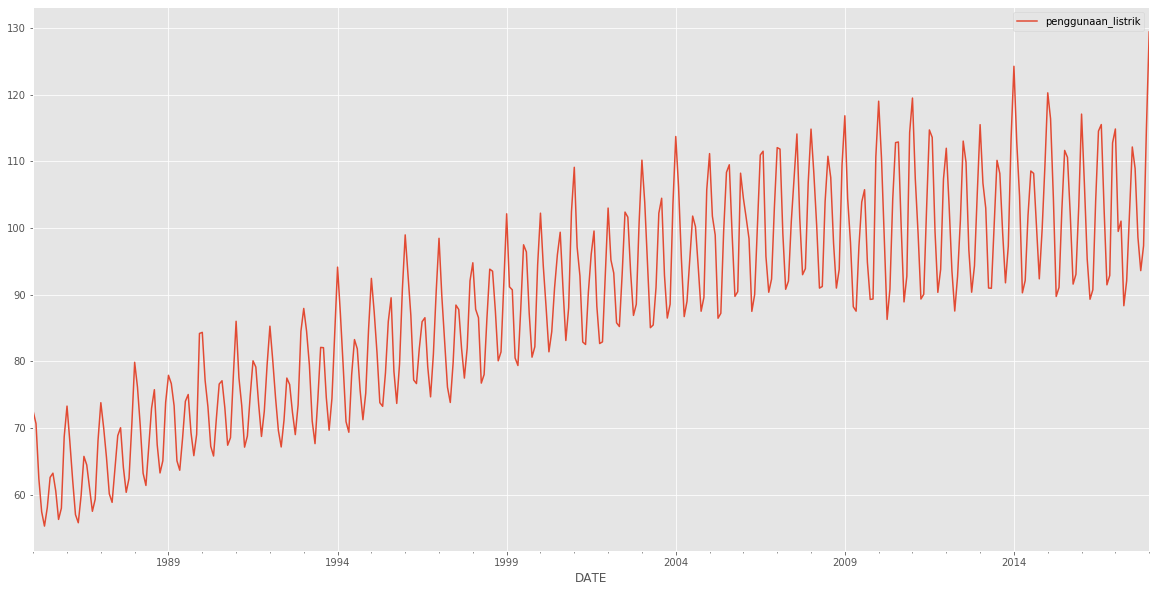

In [58]:
#Membuat grafik time series
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')
new_data_listrik.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CD59FDF848>]],
      dtype=object)

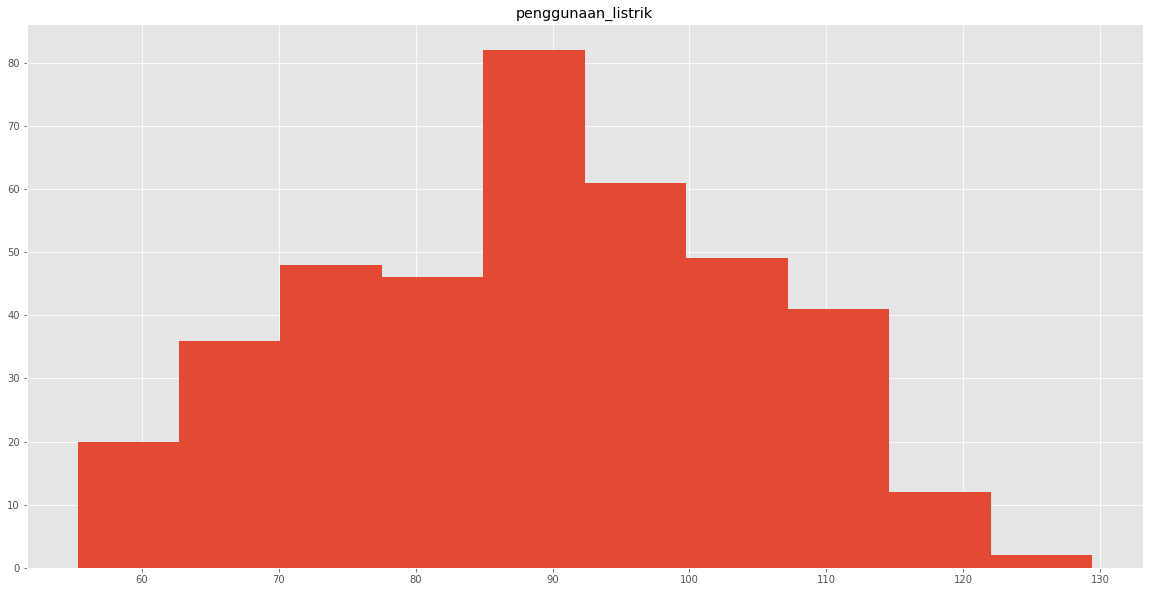

In [59]:
#Mengecek histogram dari data
new_data_listrik.hist()

## Stationary test menggunakan statistical test

In [61]:
#Splitting data
one, two, three = np.split(
        new_data_listrik['penggunaan_listrik'].sample(
        frac=1), [int(.25*len(new_data_listrik['penggunaan_listrik'])),
        int(.75*len(new_data_listrik['penggunaan_listrik']))])

In [62]:
#Menghitung mean dan varian dari data yang telah displit
mean1, mean2, mean3 = one.mean(), two.mean(), three.mean()
var1, var2, var3 = one.var(), two.var(), three.var()

print(mean1, mean2, mean3)
print(var1, var2, var3)

90.20863333333337 87.74366111111108 89.684458
260.29927347244904 229.052492588277 228.68320940185444


Dari statistical test yang dilakukan dapat diketahui bahwa mean dan varian masing-masing sample memiliki hasil yang kurang mirip sehingga data dapat dikatakan non-stationary

## Dickey Fuller Test

In [63]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(new_data_listrik['penggunaan_listrik'])

print('ADF = ' + str(adf_test[0]))
print('p-value = ' +str(adf_test[1]))
print('Critical Values:')
for key, value in adf_test[4].items():
    print('\t%s: %.3f' % (key, value))

ADF = -2.2569903500472344
p-value = 0.18621469116587125
Critical Values:
	1%: -3.448
	5%: -2.869
	10%: -2.571


Pada stationary test ini, digunakan 5% (95% confidence level) sebagai treshold. Karena p-value yang dihasilkan lebih besar dari 0.05, maka gagal mereject null hypothesis sehingga data memiliki unit root dan merupakan non-stationary.

## 3. Gunakan metode yg kamu ketahui untuk forecast penggunaan listrik 6 bulan ke depan.

<Figure size 1440x720 with 0 Axes>

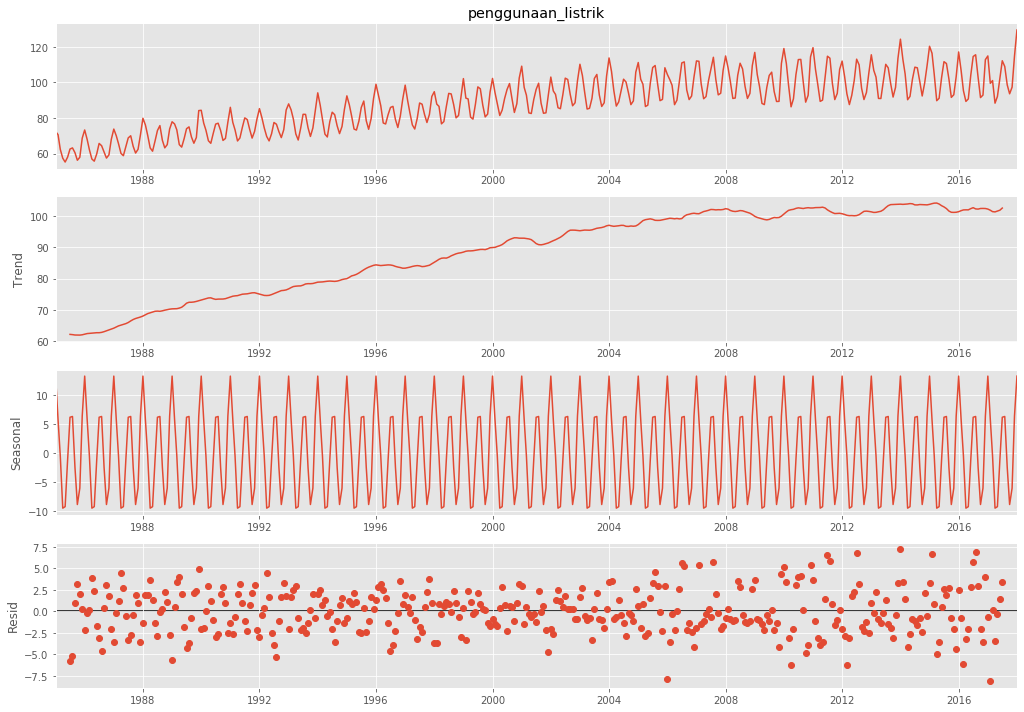

In [65]:
#Melakukan decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal = seasonal_decompose(new_data_listrik.penggunaan_listrik,model='add')
fig = plt.figure()  
fig = seasonal.plot()  
fig.set_size_inches(14, 10)

In [66]:
#Differencing
new_data_listrik['first_difference'] = new_data_listrik.penggunaan_listrik - new_data_listrik.penggunaan_listrik.shift(1)

In [77]:
new_data_listrik.dropna(subset=['first_difference'], inplace=True)

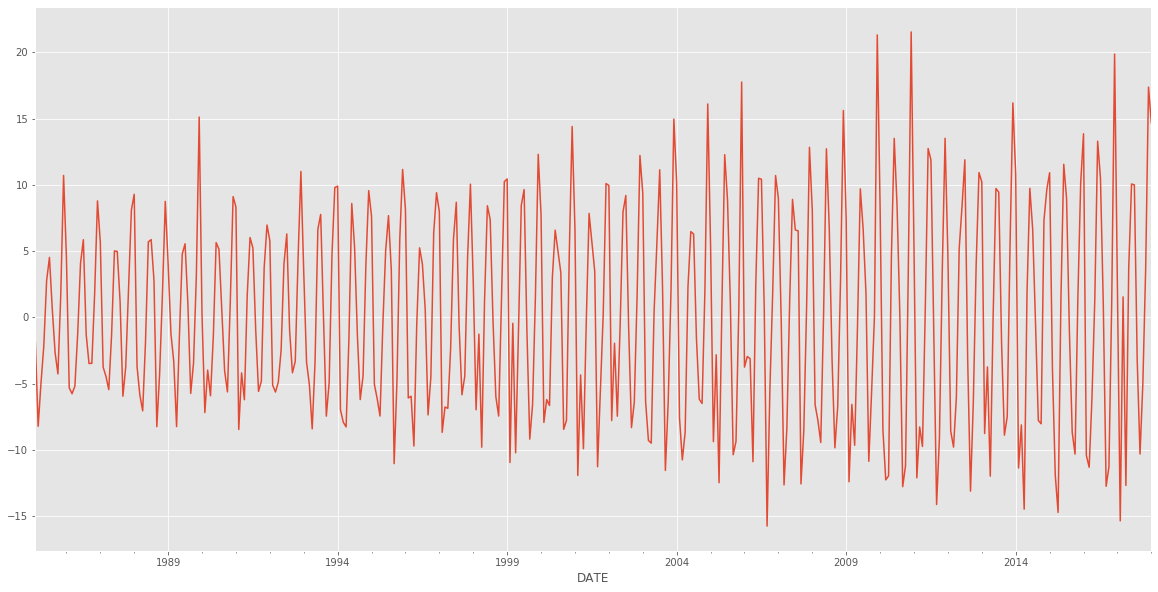

In [79]:
#Kurva setelah dilakukan differencing
new_data_listrik.first_difference.plot()

In [81]:
#Melakukan Dickey Fuller test pada data yang telah didifferencing
adf_test = adfuller(new_data_listrik['first_difference'])

print('ADF = ' + str(adf_test[0]))
print('p-value = ' +str(adf_test[1]))
print('Critical Values:')
for key, value in adf_test[4].items():
    print('\t%s: %.3f' % (key, value))

ADF = -7.1048908822672985
p-value = 4.077786565539737e-10
Critical Values:
	1%: -3.448
	5%: -2.869
	10%: -2.571


Dari kurva beserta p-value yang lebih kecil dari 0.05 maka data sekarang bersifat stationary.

In [82]:
#Menginstall package ARIMA
!pip install pmdarima

In [84]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split

In [86]:
new_data_listrik_drop = new_data_listrik.drop(columns='first_difference')

In [121]:
train, test = train_test_split(new_data_listrik_drop, train_size=0.8)

In [122]:
#Fit model
model = pm.auto_arima(train, seasonal=True, m=12)

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros

In [123]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  316
Model:             SARIMAX(1, 0, 2)x(0, 1, [1], 12)   Log Likelihood                -672.219
Date:                              Thu, 10 Sep 2020   AIC                           1356.439
Time:                                      07:37:22   BIC                           1378.741
Sample:                                           0   HQIC                          1365.360
                                              - 316                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1174      0.068      1.727      0.084      -0.016       0.251
ar.L1          0.9257      0.043     21.349      0.000       0.841       1.011
ma.L1         -0.3303      0.080     -4.118      0.000      -0.488      -0.173
ma.L2         -0.3392      0.068     -5.005      0.000      -0.472      -0.206
ma.S.L12      -0.6960      0.048    -14.553      0.000      -0.790      -0.602
sigma2         4.7504      0.287     16.539      0.000       4.187       5.313
===================================================================================
Ljung-Box (Q):                       35.95   Jarque-Bera (JB):                56.65
Prob(Q):                              0.65   Prob(JB):                         0.00
Heteroskedasticity (H):               2.50   Skew:                            -0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [124]:
#fit model
from statsmodels.tsa.statespace.sarimax import SARIMAX
pred_model = SARIMAX(train.penggunaan_listrik, order=(1,0,2), seasonal_order=(0,1,1,12))
results = pred_model.fit()

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [125]:
#Membuat prediksi
test_pred = test.copy()
test_pred = results.predict(start = len(train), end = len(new_data_listrik)-1, typ='levels')

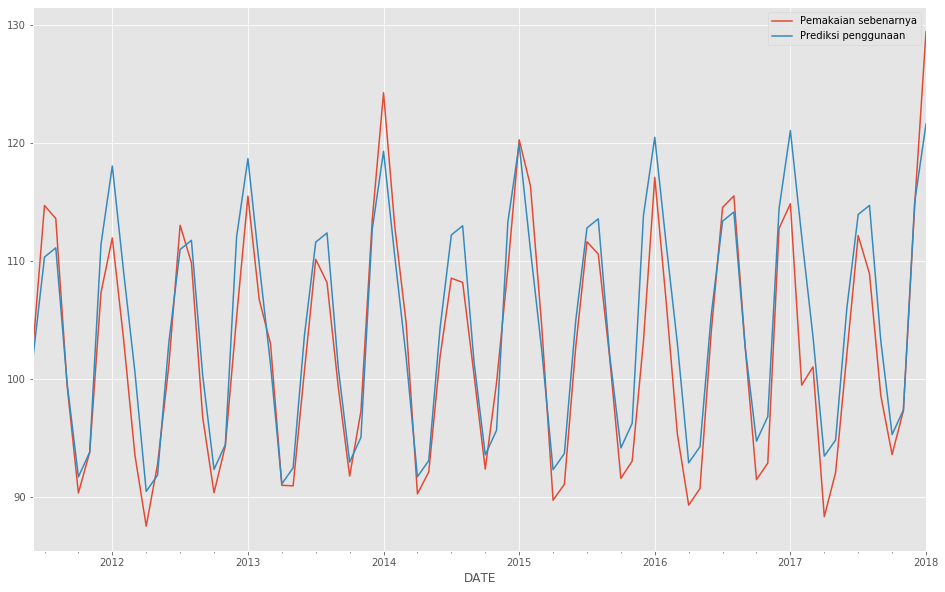

In [126]:
#Membuat kurva perbandingan yang diprediksi dengan sebenarnya
test['penggunaan_listrik'].plot(figsize = (16, 10), label='Pemakaian sebenarnya')
test_pred.plot(label = 'Prediksi penggunaan')
plt.legend(loc='upper right')

In [129]:
#Evaluasi model
from statsmodels.tools.eval_measures import rmse
arima_rmse_error = rmse(test['penggunaan_listrik'], test_pred)
arima_mse_error = arima_rmse_error**2
print(f'MSE Error = {arima_mse_error} sedangkan RMSE Error = {arima_rmse_error}')

MSE Error = 14.390375692875613 sedangkan RMSE Error = 3.793464866434855
